In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gaussian model

## 1. Import lib

In [125]:
## ML lib imports 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # version 0.18.1


## Ploting lib 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Other imports
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

## 2. Load data

In [126]:
iris = datasets.load_iris()
data = iris.data 
target = iris.target

## 3. Define model

In [127]:
clf = GaussianNB()

## 4. Train model

In [128]:
clf.fit(data, target)

GaussianNB()

## 5. Make prediction on train data 

In [129]:
result = clf.predict(data)

## 6. Accuracy

In [130]:
accuracy_score(result, target)

0.96

## 7. Confusion matrix

In [131]:
conf = confusion_matrix(target, result)
conf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

## 8. Plot confusion matrix

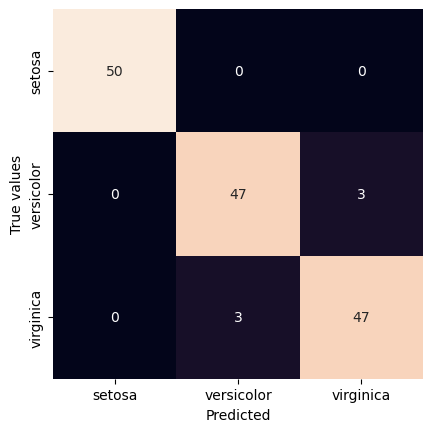

In [132]:
sns.heatmap(conf, square=True, annot=True, cbar=False,
xticklabels=list(iris.target_names),
yticklabels=list(iris.target_names))
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.show()


## 9. External validation 

In [133]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=0)

### 9.1 train model on training set and evaluate the model 

Accuracy score on the training set : 0.96


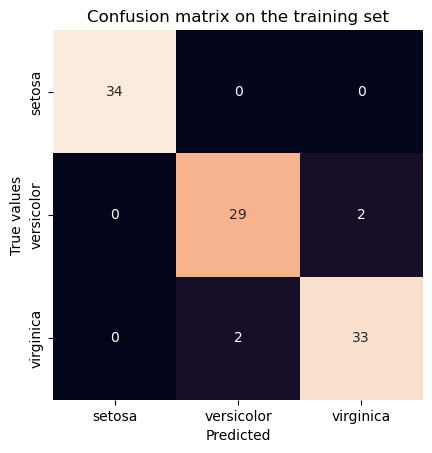

In [134]:
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(f"Accuracy score on the training set : {accuracy_score(y_train, y_train_pred)}")
sns.heatmap(
    confusion_matrix(y_train,y_train_pred), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names))

plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set")
plt.show()

### 9.2 Cross validation

Accuracy score on the training set : 0.96


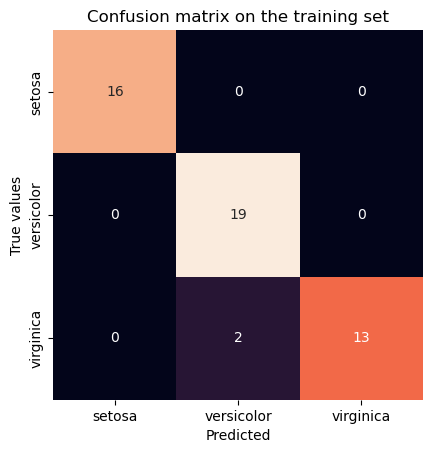

In [135]:
y_test_pred = clf.predict(X_test)
print(f"Accuracy score on the training set : {accuracy_score(y_test, y_test_pred)}")
sns.heatmap(
    confusion_matrix(y_test,y_test_pred), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names))

plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set")
plt.show()

## 10. Reduction of dimensionality

In [136]:
data_2D = iris.data[:, :2]
target_2D = iris.target

### 10.1 Construction of the model 

Accuracy score on the training set : 0.78


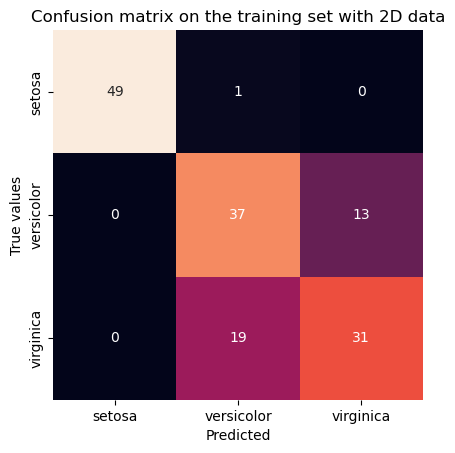

In [137]:
clf_2D = GaussianNB()
clf_2D.fit(data_2D, target_2D)
y_pred_2D = clf_2D.predict(data_2D)
print(f"Accuracy score on the training set : {accuracy_score(target_2D, y_pred_2D)}")
sns.heatmap(
    confusion_matrix(target_2D,y_pred_2D), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names)
    )
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set with 2D data")
plt.show()


## 11. Descision zone 

### 11.1 min max value 

In [138]:
x_max = np.max(data_2D)
x_min = np.min(data_2D)
y_max = np.max(target_2D)
y_min = np.min(target_2D)

In [139]:
h = 0.01

In [140]:
x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x,y)
data_samples = list(zip(xx.ravel(), yy.ravel()) )

Text(0.5, 1.0, 'Decision boundary')

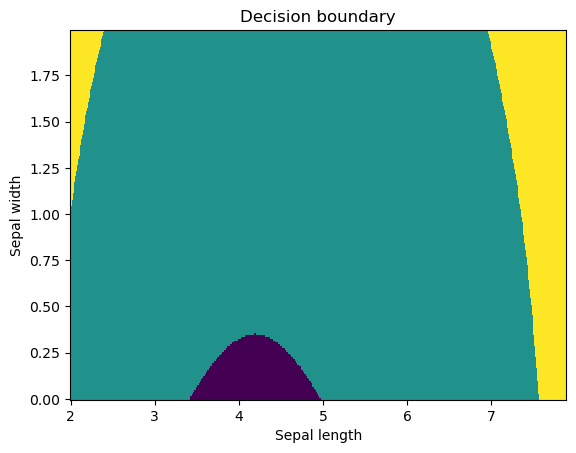

In [141]:
Z = clf_2D.predict(data_samples)
Z1 = Z.reshape(xx.shape)
fig = plt.figure(1)
plt.pcolormesh(xx, yy, Z1)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision boundary")

### 11.2 Plot descision zone

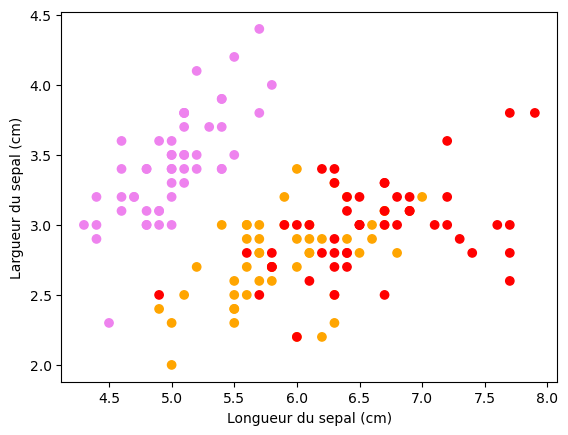

In [142]:
# plt.xlim(xx.min() - .1, xx.max() + .1)
# plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel("Longueur du sepal (cm)")
plt.ylabel("Largueur du sepal (cm)")
colors = ["violet", "orange", "red"]
C = [colors[x] for x in target]
plt.scatter(data[:, 0], data[:, 1], c=C)
plt.show()

Text(0.5, 1.0, 'Desicion boundary')

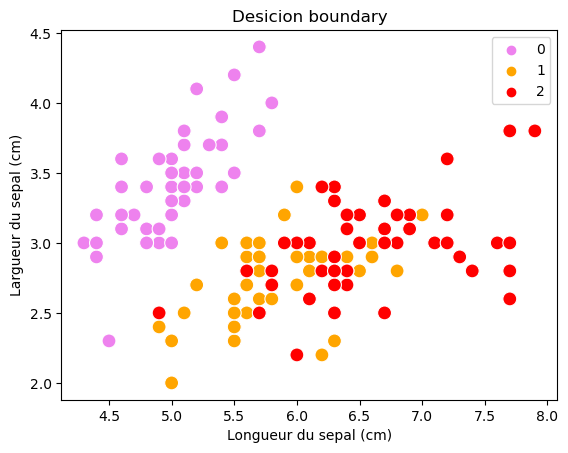

In [143]:
sns.scatterplot(
    data[:, 0], data[:, 1], # x and y
    hue=target, # color each point by its class
    palette=colors, # color
    s=100, # size of the points
    )
plt.legend()
plt.xlabel("Longueur du sepal (cm)")
plt.ylabel("Largueur du sepal (cm)")
plt.title("Desicion boundary")